# Question 1 – Functions: Root finding

In [53]:
#a), b), c)
def f(x):
    return x*x*x - x + 15

def root(a,b): 
    if(f(a) > 0 and f(b) > 0):
        print("function evals have the same sign") 
    elif(f(a) < 0 and f(b) < 0):
        print("function evals have the same sign")
    else:
        c = a
        while ((b-a) >= 0.01):
            #middle point
            c = (a+b)/2

            #Checking if middle point is root
            if (f(c) == 0.0):
                break
            if (f(c)*f(a) < 0):
                b = c
            else:
                a = c

        print("The value of root is : ","%.4f"%c)
    
#initial values for a and b
a = float(-10)
b = float(30)
root(a, b)

The value of root is :  -2.6074


# Question 2 – Numpy: Nearest neighbor

In [54]:
import numpy as np

A = np.random.normal(0, 1.0, (200, 500))

def closest(A, z):
    
    B, C = A[A>z], A[A<=z]
    ceil, floor = 0, 0
    
    if(len(B)):
        ceil = np.argmin(B)
    else:
        return C[np.argmax(C)]
    
    if(len(C)):
        floor = np.argmax(C)
    else:
        return B[ceil]

    if(abs(B[ceil]-z) < abs(C[floor]-z)):
        return B[ceil]
    else:
        return C[floor]
    

z = 4
closest_value = closest(A, z)
print("the closest value:", closest_value)

the closest value: 3.9745837301238804


# Question 3 – Classes: Binary search tree

In [55]:
class Node:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val = val

    def insert(self, val):
        if not self.val:
            self.val = val
            return

        if self.val == val:
            return

        if val < self.val:
            if self.left:
                self.left.insert(val)
                return
            self.left = Node(val)
            return

        if self.right:
            self.right.insert(val)
            return
        self.right = Node(val)

    def exist(self, val):
        if val == self.val:
            return True

        if val < self.val:
            if self.left == None:
                return False
            return self.left.exists(val)

        if self.right == None:
            return False
        
        return self.right.exists(val)
    
    def inorder(self, vals):
        if self.left is not None:
            self.left.inorder(vals)
            
        if self.val is not None:
            vals.append(self.val)
            
        if self.right is not None:
            self.right.inorder(vals)
        return vals
    
    def deleteNode(root, key):
        if root is None:
            return root
        
        if key < root.key:
            root.left = deleteNode(root.left, key)

        elif(key > root.key):
            root.right = deleteNode(root.right, key)
            
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp

            elif root.right is None:
                temp = root.left
                root = None
                return temp

            temp = minValueNode(root.right)
            root.key = temp.key
            root.right = deleteNode(root.right, temp.key)
        return root
    
nums = [71, 8, 32, 4, 65, 99, 5, 9, 14, 3, 8, 13]
bst = Node()
for num in nums:
    bst.insert(num)

print(bst.exist(71))
print(bst.inorder([]))

True
[3, 4, 5, 8, 9, 13, 14, 32, 65, 71, 99]


# Question 4 – Scipy: Optimization

In [56]:
import scipy.optimize as opt

def f(x):  
    result = np.power(np.sin(x-2), 2) * np.exp(-1*(x**2))
    return -1 * result
    
#Maximum of the function
result = opt.minimize_scalar(f)
x = result.x
print(-1*f(x))

0.9116854118471548


# Question 5 – Scipy: Pairwise distances

C:\Users\nilay\AppData\Local\Temp/ipykernel_19240/2032295699.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure)


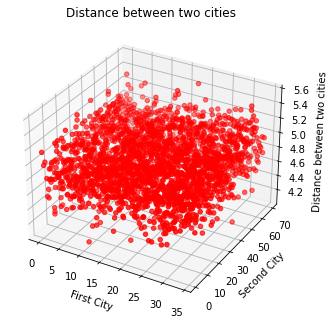

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as dis
import matplotlib.pyplot as plt

n, m = 70, 140

X = np.random.rand(n, m)

d = dis.pdist(X)

#As an example application, consider n cities, and we are given their coordinates in two columns
x = []
y = []
for a in range(0, n//2):
    x = x + [a for _ in range(1, n)]
    y = y + [b for b in range(1, n)]

#Set x and y values
x = np.array(x)
y = np.array(y)

#Now we want a nice table that tells us for each two cities, how far they are apart.
figure = plt.figure()
axes = Axes3D(figure)

#3-D table
plt.title("Distance between two cities")  
axes.set_xlabel('First City')
axes.set_ylabel('Second City')
axes.set_zlabel('Distance between two cities')

axes.scatter(x, y, d, c='r')
plt.show()

# Question 6 – Matplotlib: Data

[[ 0.21112771]
 [-1.01003133]
 [-0.35097094]
 [-0.4898019 ]
 [ 1.40714136]
 [ 1.19317797]
 [-0.08461837]
 [ 0.48298   ]
 [ 0.00287663]
 [ 0.83003701]]
[[ 0.38209329]
 [-0.97900658]
 [-0.30963388]
 [-0.45612338]
 [ 1.36039155]
 [ 1.18260238]
 [-0.10073659]
 [ 0.47671   ]
 [ 0.0104272 ]
 [ 0.80840947]]


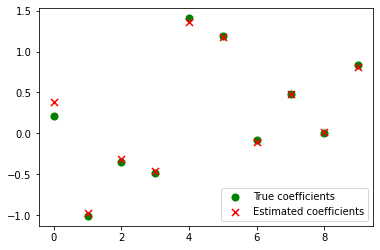

In [58]:
import random
import scipy.stats as stats
import numpy.linalg


X = np.random.randn(20, 10) * random.randint(1, 10)
b = np.random.randn(10, 1) * random.randint(1, 10)
z = np.random.randn(20, 1)
Y = np.dot(X, b) + z
b_ = np.linalg.lstsq(X, Y, rcond=None)[0]
print(b)
print(b_)
plt.scatter(range(10), list(b.T), s=50, marker='o', c='g')
plt.scatter(range(10), list(b_.T), s=50, marker='x', c='r')
plt.legend(['True coefficients','Estimated coefficients'])
plt.show()